### Import Packages

In [1]:
## Push as many as you can, if time permits this can be trimmed.
import pandas as pd
import sweetviz as sv
import pandas as pd
from sklearn import preprocessing
from scipy import stats
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,HistGradientBoostingClassifier,GradientBoostingClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score,train_test_split,cross_validate,StratifiedKFold,GroupKFold,GroupShuffleSplit,StratifiedShuffleSplit
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score,recall_score,balanced_accuracy_score,confusion_matrix,precision_score,auc,plot_roc_curve,roc_auc_score,roc_curve,accuracy_score
from xgboost import XGBClassifier
from imblearn.ensemble import BalancedRandomForestClassifier,RUSBoostClassifier,EasyEnsembleClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import t
from pandas.tseries.offsets import DateOffset
import dask.dataframe as dd
import sklearn.metrics
import dalex as dx 
from boruta import BorutaPy
from sklearn.impute import SimpleImputer
from autosklearn.classification import AutoSklearnClassifier
from autosklearn.metrics import f1,roc_auc
from sklearn.inspection import permutation_importance
import os
import pickle
from sklearn import metrics
from joblib import dump, load
from sklearn.pipeline import Pipeline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif,SelectKBest
import shap
from autosklearn.experimental.askl2 import AutoSklearn2Classifier
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from hyperopt import hp, fmin, tpe, SparkTrials, STATUS_OK, space_eval,Trials
from hyperopt.pyll import scope
import numpy as np
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import plot_confusion_matrix

### Read Input File

In [2]:
## Read txt file with | separator into a dataframe
x = pd.read_csv('./ds_practical.txt',sep='|')

### Exploratory Data Analysis

In [3]:
x.anon_person_id.nunique()

999500

In [4]:
len(x)

1000000

In [5]:
## Duplicate values
df_dups = x[x.duplicated()]

#### 500 Duplicate rows found

In [6]:
df_dups

,anon_person_id,target,state,presence_of_child_ind,streaming_media_subs,streaming_entertainment_subs,marital_status,gender,income,number_of_news_subs,age
999500,1,0,CA,0,N,0,M,Female,$175k-199k,0,43.0
999501,2,0,CA,0,N,0,U,Male,$225k-249k,0,90.0
999502,3,1,CA,0,Y,1,S,Female,$150k-174k,0,46.0
999503,4,0,CA,1,N,0,U,Female,$125k-149k,0,25.0
999504,5,0,CA,0,N,0,U,Female,$175k-199k,0,62.0
...,...,...,...,...,...,...,...,...,...,...,...
999995,496,0,CA,0,N,0,M,Female,$175k-199k,0,NaN
999996,497,0,CA,1,N,0,U,Female,$125k-149k,0,NaN
999997,498,1,CA,1,Y,1,S,Female,$100k-124k,1,NaN
999998,499,0,CA,0,N,0,U,Female,$225k-249k,0,NaN


#### Duplicates Removed

In [7]:
x2 = x.drop_duplicates()
x2.reset_index(drop=True)

,anon_person_id,target,state,presence_of_child_ind,streaming_media_subs,streaming_entertainment_subs,marital_status,gender,income,number_of_news_subs,age
0,1,0,CA,0,N,0,M,Female,$175k-199k,0,43.0
1,2,0,CA,0,N,0,U,Male,$225k-249k,0,90.0
2,3,1,CA,0,Y,1,S,Female,$150k-174k,0,46.0
3,4,0,CA,1,N,0,U,Female,$125k-149k,0,25.0
4,5,0,CA,0,N,0,U,Female,$175k-199k,0,62.0
...,...,...,...,...,...,...,...,...,...,...,...
999495,999496,0,CA,0,N,0,U,Female,$250k+,0,65.0
999496,999497,0,CA,0,N,0,M,Male,$200k-224k,0,67.0
999497,999498,0,CA,0,N,0,U,Male,$175k-199k,0,45.0
999498,999499,0,CA,0,N,0,U,Female,$200k-224k,0,30.0


In [8]:
x2

,anon_person_id,target,state,presence_of_child_ind,streaming_media_subs,streaming_entertainment_subs,marital_status,gender,income,number_of_news_subs,age
0,1,0,CA,0,N,0,M,Female,$175k-199k,0,43.0
1,2,0,CA,0,N,0,U,Male,$225k-249k,0,90.0
2,3,1,CA,0,Y,1,S,Female,$150k-174k,0,46.0
3,4,0,CA,1,N,0,U,Female,$125k-149k,0,25.0
4,5,0,CA,0,N,0,U,Female,$175k-199k,0,62.0
...,...,...,...,...,...,...,...,...,...,...,...
999495,999496,0,CA,0,N,0,U,Female,$250k+,0,65.0
999496,999497,0,CA,0,N,0,M,Male,$200k-224k,0,67.0
999497,999498,0,CA,0,N,0,U,Male,$175k-199k,0,45.0
999498,999499,0,CA,0,N,0,U,Female,$200k-224k,0,30.0


In [9]:
print("\n \033[1m Target Value Counts : \033[0m")
print(x2.target.value_counts())
print("\n \033[1m State Value Counts : \033[0m")
print(x2.state.value_counts())
print("\n \033[1m Child residing in home ? \033[0m")
print(x2.presence_of_child_ind.value_counts())
print("\n \033[1m Subscribed to streaming media ? \033[0m")
print(x2.streaming_media_subs.value_counts())
print("\n \033[1m Listens to streaming entertainment ? \033[0m")
print(x2.streaming_entertainment_subs.value_counts())
print("\n \033[1m Marital Status : \033[0m")
print(x2.marital_status.value_counts())
print("\n \033[1m Gender : \033[0m")
print(x2.gender.value_counts())
print("\n \033[1m Income : \033[0m")
print(x2.income.value_counts())


  Target Value Counts : 
0    849834
1    149666
Name: target, dtype: int64

  State Value Counts : 
CA    976587
GA     10831
DC      2058
Name: state, dtype: int64

  Child residing in home ? 
0    854883
1    144617
Name: presence_of_child_ind, dtype: int64

  Subscribed to streaming media ? 
N    825891
Y    173609
Name: streaming_media_subs, dtype: int64

  Listens to streaming entertainment ? 
0    825891
1    173609
Name: streaming_entertainment_subs, dtype: int64

  Marital Status : 
U    659594
M    290444
S     49462
Name: marital_status, dtype: int64

  Gender : 
Male       574328
Female     345986
feMalee     79186
Name: gender, dtype: int64

  Income : 
$200k-224k    230501
$175k-199k    211354
$225k-249k    173785
$150k-174k    145531
$125k-149k     82226
$250k+         80029
$100k-124k     38702
U              16945
$75k-99k       15003
$50k-74k        4506
$25k-49k         839
<$25k             79
Name: income, dtype: int64


In [10]:
## Cleaned up incorrect values of gender from feMalee to female
x2["gender"].replace({"feMalee": "Female"}, inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [11]:
x2.gender.value_counts()

Male      574328
Female    425172
Name: gender, dtype: int64

In [12]:
## Function for one-hot encoding
def one_hot_encode(df, feat):
    dum = pd.get_dummies(df[[feat]])
    new_cols = pd.concat([df, dum], axis=1)
    return(new_cols)

In [13]:
# Convert high cardinality features with classes that have low frequency (I've taken 5%) to an 'other' class
Cat_feats = ['gender','income','state','streaming_media_subs','marital_status']
for i in Cat_feats:
    low_freq = x2[i].value_counts(normalize=True)[x2[i].value_counts(normalize=True)<=0.05].index.to_list()
    x2.loc[x2[i].isin(low_freq),i] = "other"


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [14]:
## Print Value Counts after other class adjustment for low frequencies to see what has changed

print("\n \033[1m Target Value Counts : \033[0m")
print(x2.target.value_counts())
print("\n \033[1m State Value Counts : \033[0m")
print(x2.state.value_counts())
print("\n \033[1m Child residing in home ? \033[0m")
print(x2.presence_of_child_ind.value_counts())
print("\n \033[1m Subscribed to streaming media ? \033[0m")
print(x2.streaming_media_subs.value_counts())
print("\n \033[1m Listens to streaming entertainment ? \033[0m")
print(x2.streaming_entertainment_subs.value_counts())
print("\n \033[1m Marital Status : \033[0m")
print(x2.marital_status.value_counts())
print("\n \033[1m Gender : \033[0m")
print(x2.gender.value_counts())
print("\n \033[1m Income : \033[0m")
print(x2.income.value_counts())


  Target Value Counts : 
0    849834
1    149666
Name: target, dtype: int64

  State Value Counts : 
CA       976587
other     12889
Name: state, dtype: int64

  Child residing in home ? 
0    854883
1    144617
Name: presence_of_child_ind, dtype: int64

  Subscribed to streaming media ? 
N    825891
Y    173609
Name: streaming_media_subs, dtype: int64

  Listens to streaming entertainment ? 
0    825891
1    173609
Name: streaming_entertainment_subs, dtype: int64

  Marital Status : 
U        659594
M        290444
other     49462
Name: marital_status, dtype: int64

  Gender : 
Male      574328
Female    425172
Name: gender, dtype: int64

  Income : 
$200k-224k    230501
$175k-199k    211354
$225k-249k    173785
$150k-174k    145531
$125k-149k     82226
$250k+         80029
other          76074
Name: income, dtype: int64


### SweetViz package for associations and distributions

In [15]:
## Use SweetViz to do a quick EDA on all columns of dataframe, this will generate SWEETVIZ_REPORT.html in your present working directory
report = sv.analyze(x2)
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [16]:
# Extracting dummy variables from categorical values
x3 = one_hot_encode(x2, 'gender')
x3 = one_hot_encode(x3, 'income')
x3 = one_hot_encode(x3, 'state')
x3 = one_hot_encode(x3, 'streaming_media_subs')
x3 = one_hot_encode(x3, 'marital_status')
x3 = x3.drop(['state','income','streaming_media_subs','marital_status','gender','gender_Male','streaming_media_subs_N'], axis = 1)

In [17]:
x3

,anon_person_id,target,presence_of_child_ind,streaming_entertainment_subs,number_of_news_subs,age,gender_Female,income_$125k-149k,income_$150k-174k,income_$175k-199k,income_$200k-224k,income_$225k-249k,income_$250k+,income_other,state_CA,state_other,streaming_media_subs_Y,marital_status_M,marital_status_U,marital_status_other
0,1,0,0,0,0,43.0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
1,2,0,0,0,0,90.0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
2,3,1,0,1,0,46.0,1,0,1,0,0,0,0,0,1,0,1,0,0,1
3,4,0,1,0,0,25.0,1,1,0,0,0,0,0,0,1,0,0,0,1,0
4,5,0,0,0,0,62.0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999495,999496,0,0,0,0,65.0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
999496,999497,0,0,0,0,67.0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
999497,999498,0,0,0,0,45.0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
999498,999499,0,0,0,0,30.0,1,0,0,0,1,0,0,0,1,0,0,0,1,0


### Train-Test Split

In [19]:
x4 = x3.drop(columns = ['anon_person_id']).reset_index(drop=True)
anon_pid = x3['anon_person_id']
X = x4.drop(columns = ['target']).reset_index(drop=True)
y = x4['target'].reset_index(drop=True)


for i in range(1000):
    sss= StratifiedShuffleSplit(n_splits=1,test_size=0.3, random_state=i)
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.loc[train_index,:], X.loc[test_index,:]
        y_train, y_test = y[train_index], y[test_index] # TEST SETS WILL BE HELD OUT UNTIL VERY END
        anon_pid_train, anon_pid_test = anon_pid[train_index],anon_pid[test_index]
        # CHECK IF THERE IS ANY SIGNIFICANT DIFFERENCE, IF NOT THEN BREAK, OTHERWISE KEEP LOOPING
        _, age_pval = stats.ttest_ind(X_train['age'],X_test['age'])
        if age_pval >0.05:
            print(age_pval)
            print(i)
            break
    else:
        continue
    break

In [20]:
# Save the train/test data
with open('Train_Test_Save.pkl', 'wb') as f:
    pickle.dump([X_train, X_test, y_train, y_test,anon_pid_train, anon_pid_test], f)

In [21]:
with open('Train_Test_Save.pkl', 'rb') as f: 
    X_train, X_test, y_train, y_test,Member_IDs_train, Member_IDs_test = pickle.load(f)

[None, None, None, None, None, None, None, None, None, None, None, None]

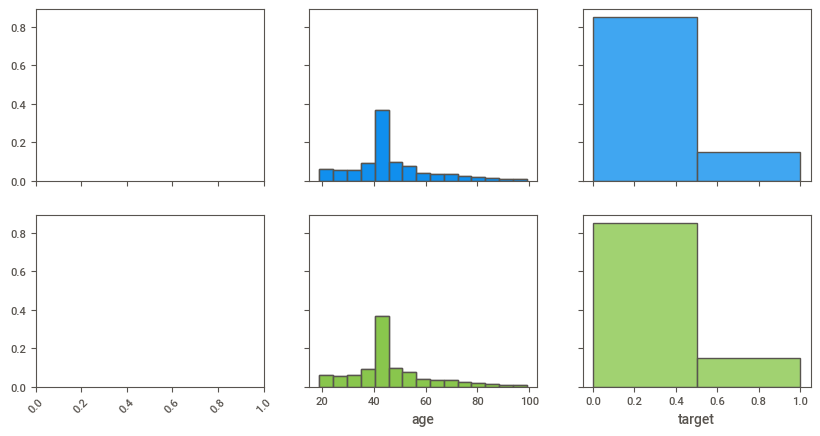

In [22]:
fig, axs = plt.subplots(2, 3,sharex='col',sharey='all',figsize=(10, 5))
sns.histplot(X_train['age'],bins=15,ax = axs[0, 1],stat='probability')
sns.histplot(X_test['age'],bins=15,ax = axs[1, 1],color="#82C341",stat='probability')
sns.histplot(X_train['age'],bins=15,ax = axs[0, 1],stat='probability')
sns.histplot(X_test['age'],bins=15,ax = axs[1, 1],color="#82C341",stat='probability')
sns.histplot(y_train,bins=2,ax = axs[0, 2],stat='probability')
sns.histplot(y_test,bins=2,ax = axs[1, 2],color="#82C341",stat='probability')
plt.setp(axs[1, 0].xaxis.get_majorticklabels(), rotation=45)

### A Few models Now

#### * A Native Model

####  * Random Forest Model

In [33]:
# set up the collection of models we will quickly loop, try a broad selection
BaselineModels = [
          ('Random Forest (RF)', RandomForestClassifier()),
          ('Balanced RF', BalancedRandomForestClassifier()),
          ('AdaBoost', AdaBoostClassifier()),
          ('Hist Boost', HistGradientBoostingClassifier()),
          ('Gradiant Boost', GradientBoostingClassifier()),
          ('RUSBoostClassifier', RUSBoostClassifier()),
          ('EasyEnsembleClassifier', EasyEnsembleClassifier()),
          ('LogisticRegression', LogisticRegression(solver='liblinear'))
        ]

In [37]:
## Some metrics
dfs = []
scoring = ['f1','recall','precision','roc_auc']
for name, model in BaselineModels:
        kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
        cv_results = cross_validate(model, np.nan_to_num(X_train), y_train, cv=kfold, scoring=scoring)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
        ##print(this_df)
final = pd.concat(dfs, ignore_index=True)

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/achaudhary/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 56, in _cached_call
    return cache[method]
KeyError: 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/achaudhary/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 334, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/achaudhary/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 58, in _cached_call
    result = getattr(estimator, method)(*args, **kwargs)
AttributeError: 'GaussianNB' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/achaudhary/anaconda3/lib/python3.8/site-packages

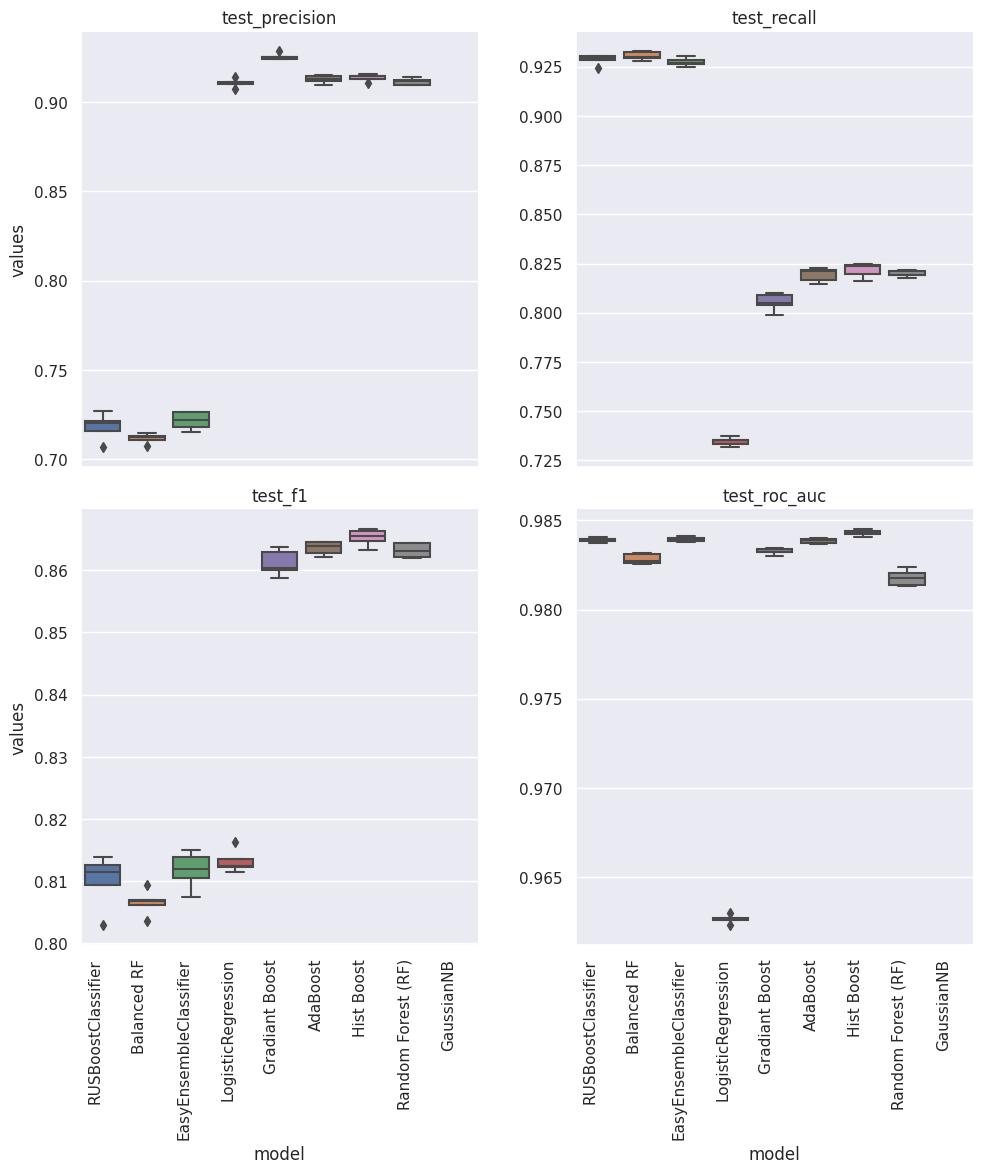

In [39]:
## Plot performance of different models
final[final['model']=='Balanced RF']['test_f1'].mean()

results_long = pd.melt(final,id_vars=['model'],var_name='metrics', value_name='values').sort_values(by='values')
time_metrics = ['fit_time','score_time'] # fit time metrics

results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)]

sns.set_theme()
g = sns.catplot(x="model", y="values",
                hue="model", col="metrics",
                data=results_long_nofit, kind="box",col_wrap=2,legend_out=True,sharey=False,dodge=False);

g.set_titles("{col_name}")

for ax in g.axes.flatten(): ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha='right')

In [38]:
# Output a table of the various results
final.groupby('model').mean()

,fit_time,score_time,test_f1,test_recall,test_precision,test_roc_auc
model,,,,,,
AdaBoost,16.792739,1.573965,0.863567,0.819293,0.912915,0.983847
Balanced RF,21.262826,3.832100,0.806593,0.930540,0.711789,0.982837
EasyEnsembleClassifier,41.756479,14.275564,0.811781,0.927553,0.721718,0.983944
GaussianNB,0.241050,0.224707,NaN,NaN,NaN,NaN
Gradiant Boost,61.673324,0.588924,0.861171,0.805280,0.925419,0.983256
Hist Boost,5.151771,0.372736,0.865282,0.821688,0.913775,0.984292
LogisticRegression,2.583129,0.265192,0.813213,0.734551,0.910747,0.962653
RUSBoostClassifier,12.652620,1.585290,0.810042,0.928689,0.718315,0.983895
Random Forest (RF),27.058638,3.855794,0.863229,0.819703,0.911639,0.981781


In [55]:
# Output a table of the various results
final.groupby('model').mean()

,fit_time,score_time,test_f1,test_recall,test_precision,test_roc_auc
model,,,,,,
AdaBoost,0.099647,0.000000,NaN,NaN,NaN,NaN
Balanced RF,0.113142,0.000000,NaN,NaN,NaN,NaN
EasyEnsembleClassifier,0.379674,0.000000,NaN,NaN,NaN,NaN
GaussianNB,0.099927,0.000000,NaN,NaN,NaN,NaN
Gradiant Boost,0.116613,0.000000,NaN,NaN,NaN,NaN
Hist Boost,16.339242,0.305077,0.865389,0.822681,0.912781,0.984308
LogisticRegression,0.128002,0.000000,NaN,NaN,NaN,NaN
RUSBoostClassifier,0.111310,0.000000,NaN,NaN,NaN,NaN
Random Forest (RF),0.113375,0.000000,NaN,NaN,NaN,NaN


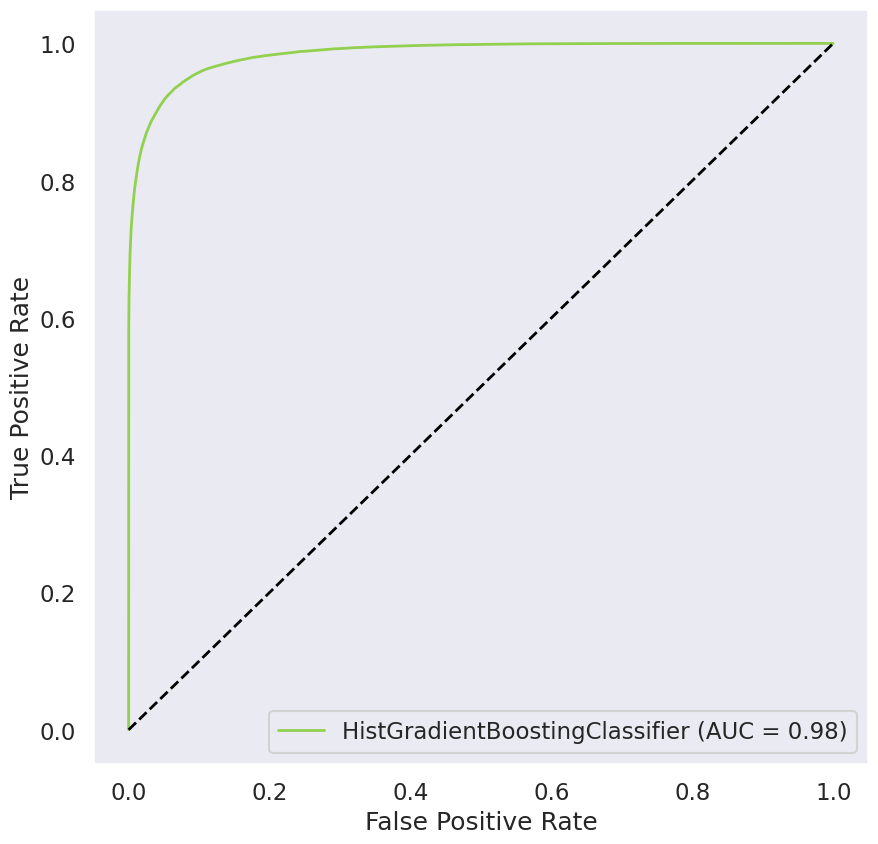

In [41]:
HGB = HistGradientBoostingClassifier().fit(X_train,y_train)
sns.set_style("dark")
sns.set_context("talk")
# Output the ROC of a basic model
fig, ax = plt.subplots(1, 1,figsize=(10,10))
svc_disp = plot_roc_curve(HGB, X_test, y_test,ax=ax,lw=2,color='#92D050')
ax.set_ylabel('True Positive Rate')
ax.set_xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')

In [42]:
y_pred = HGB.predict(X_test)
y_pred_prob = HGB.predict_proba(X_test)

In [43]:
y_pred_prob

array([[9.55129144e-01, 4.48708561e-02],
       [9.50057324e-01, 4.99426762e-02],
       [9.75706330e-01, 2.42936697e-02],
       ...,
       [9.71767963e-01, 2.82320372e-02],
       [9.99987186e-01, 1.28138251e-05],
       [9.98758594e-01, 1.24140642e-03]])

In [44]:
sum(y_pred)

40755

In [44]:
# BASIC FS

HGBC = HistGradientBoostingClassifier()

sfs1 = SFS(HGBC, 
           n_jobs=10,
           k_features=18, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='roc_auc',
           cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42))

sfs1 = sfs1.fit(X_train,y_train)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   9 out of  18 | elapsed:   42.7s remaining:   42.7s
[Parallel(n_jobs=10)]: Done  18 out of  18 | elapsed:  1.2min finished

[2021-11-20 23:21:54] Features: 1/18 -- score: 0.870267913164783[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   7 out of  17 | elapsed:   54.5s remaining:  1.3min
[Parallel(n_jobs=10)]: Done  17 out of  17 | elapsed:  1.7min finished

[2021-11-20 23:23:36] Features: 2/18 -- score: 0.9393375753058468[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   6 out of  16 | elapsed:   54.5s remaining:  1.5min
[Parallel(n_jobs=10)]: Done  16 out of  16 | elapsed:  1.7min finished

[2021-11-20 23:25:21] Features: 3/18 -- score: 0.9625438381603839[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   4 out of 

In [45]:
## Hyperparameter tuning to tune Histboost
def objective(params):
    if 'max_depth' in params: params['max_depth']=int(params['max_depth'])
    if 'max_leaf_nodes' in params: params['max_leaf_nodes']=int(params['max_leaf_nodes'])
    if 'min_samples_leaf' in params: params['min_samples_leaf']=int(params['min_samples_leaf']) 
    if 'max_bins' in params: params['max_bins']=int(params['max_bins'])

    
    clf = HistGradientBoostingClassifier(**params)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
    AUC = cross_val_score(clf, X_train,y_train,scoring='roc_auc',cv=kfold).mean()
    
    # Because fmin() tries to minimize the objective, this function must return the negative accuracy. 
    return {'loss': -AUC, 'status': STATUS_OK}

In [46]:
# Set up the parameter space
search_space = {
    'max_depth' : hp.quniform('max_depth', 1, 30, 1)                                  # depth of trees (preference is for shallow trees or even stumps (max_depth=1))
    ,'learning_rate' : hp.loguniform('learning_rate', np.log(0.01), np.log(0.40))     # learning rate for XGBoost
    ,'max_leaf_nodes' : hp.quniform('max_leaf_nodes', 2, 100,1) # Max leaf nodes
    ,'min_samples_leaf': hp.quniform('min_samples_leaf', 2, 100,1)# 
    ,'max_bins' : hp.quniform('max_bins', 3,255,1)   
    }

In [48]:
# Initialize trials object, many more evaluations can be done if time permits

best = fmin(
    fn=objective,
    space = search_space, 
    algo=tpe.suggest, 
    max_evals=2, 
    trials=SparkTrials(parallelism=6) 

)
    #Trials() 
print("Best: {}".format(best))

100%|██████████| 2/2 [3:01:42<00:00, 5451.13s/trial, best loss: -0.984217777793264]    


Total Trials: 2: 2 succeeded, 0 failed, 0 cancelled.


Best: {'learning_rate': 0.06370828524788412, 'max_bins': 219.0, 'max_depth': 18.0, 'max_leaf_nodes': 56.0, 'min_samples_leaf': 27.0}


In [49]:
## Use the best performing one
params = {'learning_rate': 0.06370828524788412, 'max_bins': 219, 'max_depth': 18, 'max_leaf_nodes': 56, 'min_samples_leaf': 27}
clf = HistGradientBoostingClassifier(**params)
clf.fit(X_train,y_train)

HistGradientBoostingClassifier(learning_rate=0.06370828524788412, max_bins=219,
                               max_depth=18, max_leaf_nodes=56,
                               min_samples_leaf=27)

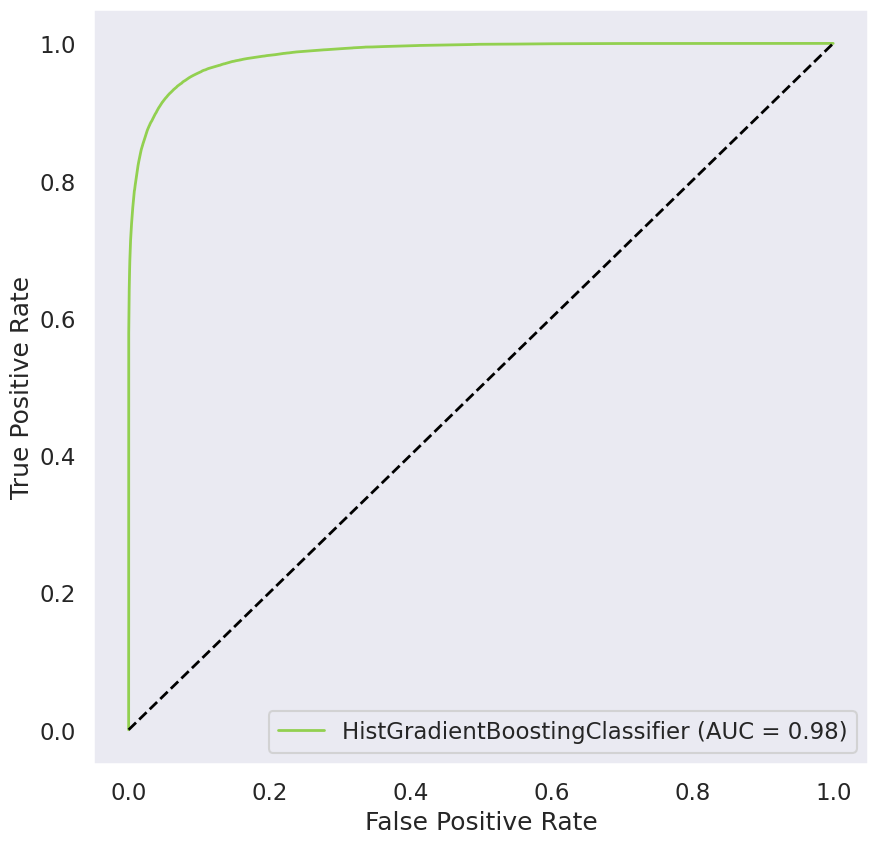

In [50]:
sns.set_style("dark")
sns.set_context("talk")
# Output the ROC of this basic model
fig, ax = plt.subplots(1, 1,figsize=(10,10))
svc_disp = plot_roc_curve(clf, X_test, y_test,ax=ax,lw=2,color='#92D050')
ax.set_ylabel('True Positive Rate')
ax.set_xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')

In [52]:
clf_unopt = HistGradientBoostingClassifier()
clf_unopt.fit(X_train,y_train)

HistGradientBoostingClassifier()

In [53]:
print(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))
print(roc_auc_score(y_test, clf_unopt.predict_proba(X_test)[:, 1]))

0.984579407858041
0.9846422079791183


In [54]:
## Get Test Prediction probabilities and predicted class
prediction_test_prob = clf.predict_proba(X_test)
prediction_test = clf.predict(X_test)

In [56]:
## Number of rows in Test set
len(prediction_test_prob)

299850

In [60]:
sum(prediction_test)

40458

In [63]:
ToPlotProb = pd.DataFrame(data={'Target':y_test.values,'Model Output': prediction_test_prob[:,1]})

ToPlotProb['Target'] = ToPlotProb['Target'].map({0: 'Not a prospect', 1: 'Prospect'})

<AxesSubplot:xlabel='Model Output', ylabel='Probability'>

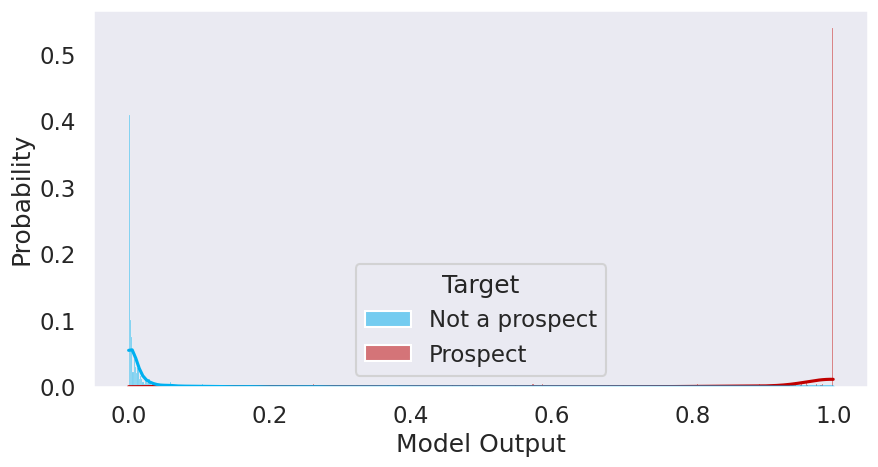

In [64]:
fig, axs = plt.subplots(1, 1,figsize=(10,5))
sns.set_style("dark")
sns.set_context("talk")

colors = ["#00B0F0","#C00000"]
sns.set_palette(sns.color_palette(colors))

sns.histplot(data=ToPlotProb, x="Model Output", hue="Target",stat='probability',common_norm=False,kde=True)

In [65]:
median_n = ToPlotProb.loc[ToPlotProb['Target'].isin(['Not a prospect']),'Model Output'].median()
median_y = ToPlotProb.loc[ToPlotProb['Target'].isin(['Prospect']),'Model Output'].median()
print('Median Score for Non-prospects : {} . Median Score for Prospects {}'.format(median_n, median_y))

Median Score for Non-prospects : 0.0034390321111328168 . Median Score for Prospects 0.9986359315932828


In [66]:
## Retrain with all data, train + test
Combined_X = pd.concat([X_train,X_test],ignore_index=True)
Combined_y = pd.concat([y_train,y_test],ignore_index=True)
params = {'learning_rate': 0.06370828524788412, 'max_bins': 219, 'max_depth': 18, 'max_leaf_nodes': 56, 'min_samples_leaf': 27}
final_clf = HistGradientBoostingClassifier(**params)
final_clf.fit(Combined_X,Combined_y)

## Save into PKL
with open('Train_Test_Model.pkl', 'wb') as f: 
    pickle.dump([final_clf,Combined_X,Combined_y], f)

### SHAPLEY Explainability

In [68]:
shap_values = shap.TreeExplainer(final_clf).shap_values(Combined_X)

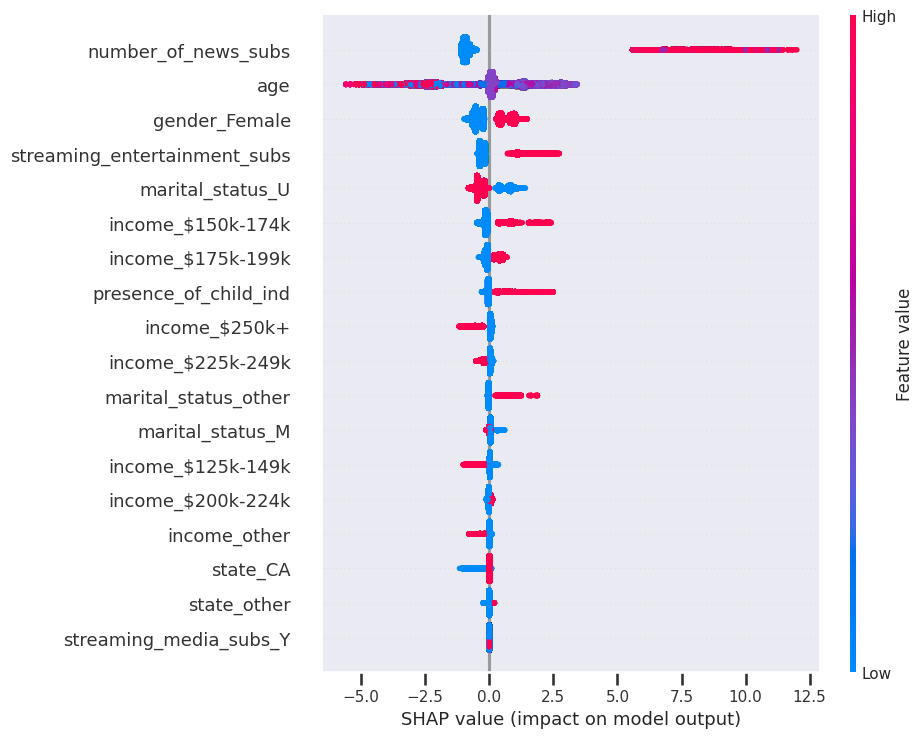

In [69]:
shap.summary_plot(shap_values, Combined_X)

In [70]:
Shap_Model_Impact_df = pd.DataFrame(data = {'Feature':list(Combined_X.columns),'Value':np.absolute(shap_values).mean(0)})
Shap_Model_Impact_df.to_csv('./SHAP_Values.csv')

In [74]:
### Merge Dataframes to create requested scores.csv File

merged = pd.merge(left=X_test, left_index=True,right=y_test, right_index=True,how='inner')

In [76]:
df_prediction_test=pd.DataFrame(prediction_test)

In [81]:
df_prediction_test[0].value_counts()

0    259392
1     40458
Name: 0, dtype: int64

In [84]:
merged['prediction_test'] = prediction_test.tolist()

In [85]:
merged['prediction_test_prob'] = prediction_test_prob.tolist()

In [86]:
merged

,presence_of_child_ind,streaming_entertainment_subs,number_of_news_subs,age,gender_Female,income_$125k-149k,income_$150k-174k,income_$175k-199k,income_$200k-224k,income_$225k-249k,...,income_other,state_CA,state_other,streaming_media_subs_Y,marital_status_M,marital_status_U,marital_status_other,target,prediction_test,prediction_test_prob
726853,0,0,0,43.0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,"[0.9613276744447884, 0.0386723255552116]"
966544,0,0,0,48.0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,"[0.9440487492874571, 0.05595125071254293]"
367152,0,1,0,36.0,0,0,0,0,0,1,...,0,1,0,1,0,1,0,0,0,"[0.9803106405731988, 0.01968935942680116]"
52150,0,0,0,45.0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,"[0.9893981719689771, 0.010601828031022923]"
682018,0,0,0,28.0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,"[0.9992418742499843, 0.0007581257500156973]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564331,0,0,0,45.0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,"[0.9914716128946442, 0.008528387105355785]"
196,0,0,0,61.0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,"[0.9987881930660981, 0.0012118069339018575]"
712937,0,0,0,45.0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,"[0.9711772175834911, 0.02882278241650893]"
541306,0,0,0,79.0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,"[0.9996397252380159, 0.0003602747619840633]"


In [87]:
merged.prediction_test.value_counts()

0    259392
1     40458
Name: prediction_test, dtype: int64

In [88]:
merged.target.value_counts()

0    254950
1     44900
Name: target, dtype: int64

In [92]:
z = merged

z['Mismatches'] = merged['target'] - merged['prediction_test']

In [93]:
## Total Mismatches , mismatches are non-zero values here ~11k
z['Mismatches'].value_counts()

 0    288460
 1      7916
-1      3474
Name: Mismatches, dtype: int64

In [105]:
## Confusion Matrix using Test set
print(metrics.confusion_matrix(merged['target'],merged['prediction_test'], labels=[0,1]))

[[251476   3474]
 [  7916  36984]]


In [109]:
print("Recall:",recall_score(merged['target'],merged['prediction_test'], average='binary'))
print("Precision:",precision_score(merged['target'],merged['prediction_test'], average='binary'))
print("F1 Score:",f1_score(merged['target'],merged['prediction_test'], average='binary'))

Recall: 0.8236971046770601
Precision: 0.9141331751445944
F1 Score: 0.8665620094191523


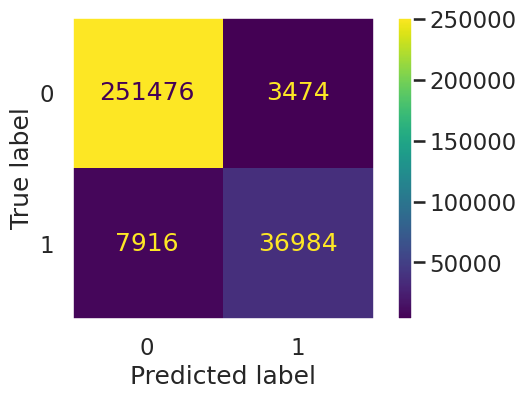

In [111]:
### Some Viz
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

In [94]:
merged2 = pd.merge(left=merged, left_index=True,right=x3, right_index=True,how='inner')

In [95]:
merged2

,presence_of_child_ind_x,streaming_entertainment_subs_x,number_of_news_subs_x,age_x,gender_Female_x,income_$125k-149k_x,income_$150k-174k_x,income_$175k-199k_x,income_$200k-224k_x,income_$225k-249k_x,...,income_$200k-224k_y,income_$225k-249k_y,income_$250k+_y,income_other_y,state_CA_y,state_other_y,streaming_media_subs_Y_y,marital_status_M_y,marital_status_U_y,marital_status_other_y
726853,0,0,0,43.0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
966544,0,0,0,48.0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
367152,0,1,0,36.0,0,0,0,0,0,1,...,0,1,0,0,1,0,1,0,1,0
52150,0,0,0,45.0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
682018,0,0,0,28.0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564331,0,0,0,45.0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
196,0,0,0,61.0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
712937,0,0,0,45.0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
541306,0,0,0,79.0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [98]:
###Trim down the dataframe to create scores.csv file

merged_csv = merged2[['anon_person_id','target_x', 'prediction_test','prediction_test_prob']]

##df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})

In [100]:
## Rename the columns to those needed in scores file
merged_csv = merged_csv.rename(columns={'target_x': 'target', 'prediction_test': 'prediction', 'prediction_test_prob': 'probability'})

In [102]:
## I am choosing to send both probability scores in a list 
##, alternatively we can rename the probability column to prospect_probability or something and then send only 1
merged_csv.to_csv('./scores.csv',index=False)